In [ ]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load the accelerometer data

In [ ]:
#check sample csv
acc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/acc.csv') #specify name.csv

acc.head(5)

Unnamed: 0  user_id                     timestamp      x      y      z
0           0      126  2024-07-10T12:10:23.961+0900  0.113  0.100  9.696
1           1      126  2024-07-10T12:10:24.010+0900  0.137  0.102  9.684
2           2      126  2024-07-10T12:10:24.077+0900  0.122  0.092  9.694
3           3      126  2024-07-10T12:10:24.147+0900  0.125  0.119  9.691
4           4      126  2024-07-10T12:10:24.272+0900  0.128  0.105  9.688

In [ ]:
acc = acc.loc[:, ~acc.columns.str.contains('^Unnamed')] #delete generated extra column
print(acc.shape)
acc.head(3)

(370135, 5)


user_id                     timestamp      x      y      z
0      126  2024-07-10T12:10:23.961+0900  0.113  0.100  9.696
1      126  2024-07-10T12:10:24.010+0900  0.137  0.102  9.684
2      126  2024-07-10T12:10:24.077+0900  0.122  0.092  9.694

In [ ]:
acc.dtypes

user_id        int64
timestamp     object
x            float64
y            float64
z            float64
dtype: object

In [ ]:
#acc['timestamp'] = pd.to_datetime(acc.timestamp, format='%Y-%m-%d %H:%M:%S.%f').dt.tz_localize(None)
acc["timestamp"] = pd.to_datetime(acc["timestamp"]).dt.tz_localize(None)
acc.head(3)

user_id               timestamp      x      y      z
0      126 2024-07-10 12:10:23.961  0.113  0.100  9.696
1      126 2024-07-10 12:10:24.010  0.137  0.102  9.684
2      126 2024-07-10 12:10:24.077  0.122  0.092  9.694

In [ ]:
acc.dtypes

user_id               int64
timestamp    datetime64[ns]
x                   float64
y                   float64
z                   float64
dtype: object

In [ ]:
acc = acc.sort_values(by=['timestamp'])

acc.head(4)  #check short duration

user_id               timestamp      x      y      z
179856      128 2024-07-10 12:08:42.555  0.205  9.678  1.626
179857      128 2024-07-10 12:08:42.754  0.430  9.579  1.575
179858      128 2024-07-10 12:08:42.955  0.790  9.665  1.651
179859      128 2024-07-10 12:08:43.152  0.697  9.561  1.373

In [ ]:
labels = labels.sort_values(by=['finished_at'])

labels.tail(4)  #check short duration

value  record_id  activity_target_id  \
20                            45       1509               40362   
19                            37       1508               40362   
15  ["acute cough since 2 days"]       1511               40362   
13                        Normal       1510               40362   

           record     activity  activity_id  target_id          started_at  \
20       I-weight  I - Checkup          203        126 2024-07-10 06:33:00   
19  I-temperature  I - Checkup          203        126 2024-07-10 06:33:00   
15    I-diagnosis  I - Checkup          203        126 2024-07-10 06:33:00   
13      I-emotion  I - Checkup          203        126 2024-07-10 06:33:00   

           finished_at  user_id  duration  duration_min  
20 2024-07-10 06:34:00      127      60.0           1.0  
19 2024-07-10 06:34:00      127      60.0           1.0  
15 2024-07-10 06:34:00      127      60.0           1.0  
13 2024-07-10 06:34:00      127      60.0           1.0

##Load the labels

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interns 2024 Sozolab/indonesians/label.csv')
labels.head(5)

Unnamed: 0   value  record_id  activity_target_id         record  \
0           0   Happy       1498               40275      I-emotion   
1           1      36       1496               40275  I-temperature   
2           2      45       1497               40275       I-weight   
3           3  Normal       1498               40276      I-emotion   
4           4    35.5       1496               40278  I-temperature   

      activity  activity_id  target_id       started_at      finished_at  \
0  I - Walking          200        126  2024/7/10 12:09  2024/7/10 12:09   
1  I - Walking          200        126  2024/7/10 12:09  2024/7/10 12:09   
2  I - Walking          200        126  2024/7/10 12:09  2024/7/10 12:09   
3  I - Walking          200        126  2024/7/10 12:11  2024/7/10 12:11   
4  I - Walking          200        126  2024/7/10 12:09  2024/7/10 12:09   

   user_id  
0      126  
1      126  
2      126  
3      126  
4      127

In [ ]:
labels = labels.loc[:, ~labels.columns.str.contains('^Unnamed')] #delete generated extra column
print(labels.shape)
labels.head(3)

(35, 10)


value  record_id  activity_target_id         record     activity  \
0  Happy       1498               40275      I-emotion  I - Walking   
1     36       1496               40275  I-temperature  I - Walking   
2     45       1497               40275       I-weight  I - Walking   

   activity_id  target_id       started_at      finished_at  user_id  
0          200        126  2024/7/10 12:09  2024/7/10 12:09      126  
1          200        126  2024/7/10 12:09  2024/7/10 12:09      126  
2          200        126  2024/7/10 12:09  2024/7/10 12:09      126

In [ ]:
labels.dtypes

value                 object
record_id              int64
activity_target_id     int64
record                object
activity              object
activity_id            int64
target_id              int64
started_at            object
finished_at           object
user_id                int64
dtype: object

In [ ]:
labels["started_at"] = pd.to_datetime(labels["started_at"]).dt.tz_localize(None)
labels["finished_at"] = pd.to_datetime(labels["finished_at"]).dt.tz_localize(None)
labels.head(3)

value  record_id  activity_target_id         record     activity  \
0  Happy       1498               40275      I-emotion  I - Walking   
1     36       1496               40275  I-temperature  I - Walking   
2     45       1497               40275       I-weight  I - Walking   

   activity_id  target_id          started_at         finished_at  user_id  
0          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      126  
1          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      126  
2          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      126

In [ ]:
labels.tail(3)

value  record_id  activity_target_id       record  \
32                            45       1509               40362     I-weight   
33                        Normal       1510               40362    I-emotion   
34  ["acute cough since 2 days"]       1511               40362  I-diagnosis   

       activity  activity_id  target_id          started_at  \
32  I - Checkup          203        126 2024-07-10 15:33:00   
33  I - Checkup          203        126 2024-07-10 15:33:00   
34  I - Checkup          203        126 2024-07-10 15:33:00   

           finished_at  user_id  
32 2024-07-10 15:34:00      127  
33 2024-07-10 15:34:00      127  
34 2024-07-10 15:34:00      127

##Add labels to undefined accelerometer data

In [ ]:
acc["activity"] = 'others'
acc.head()

user_id               timestamp      x      y      z activity
179856      128 2024-07-10 12:08:42.555  0.205  9.678  1.626   others
179857      128 2024-07-10 12:08:42.754  0.430  9.579  1.575   others
179858      128 2024-07-10 12:08:42.955  0.790  9.665  1.651   others
179859      128 2024-07-10 12:08:43.152  0.697  9.561  1.373   others
179860      128 2024-07-10 12:08:43.352  0.465  9.660  1.578   others

In [ ]:
acc["target"] = 'others'
acc.head()

user_id               timestamp      x      y      z activity  target
179856      128 2024-07-10 12:08:42.555  0.205  9.678  1.626   others  others
179857      128 2024-07-10 12:08:42.754  0.430  9.579  1.575   others  others
179858      128 2024-07-10 12:08:42.955  0.790  9.665  1.651   others  others
179859      128 2024-07-10 12:08:43.152  0.697  9.561  1.373   others  others
179860      128 2024-07-10 12:08:43.352  0.465  9.660  1.578   others  others

#Annotate unlabeled others and fonlog label

In [ ]:
import pandas as pd
import warnings

In [ ]:
df_acc = acc
df_acc = df_acc.sort_values(by=['timestamp'])
df_acc.head()

user_id               timestamp      x      y      z activity  target
179856      128 2024-07-10 12:08:42.555  0.205  9.678  1.626   others  others
179857      128 2024-07-10 12:08:42.754  0.430  9.579  1.575   others  others
179858      128 2024-07-10 12:08:42.955  0.790  9.665  1.651   others  others
179859      128 2024-07-10 12:08:43.152  0.697  9.561  1.373   others  others
179860      128 2024-07-10 12:08:43.352  0.465  9.660  1.578   others  others

In [ ]:
for i in range(len(labels)):
    ind = df_acc[(df_acc['timestamp'] >= labels['started_at'][i]) & (df_acc['timestamp'] <= labels['finished_at'][i])].index
    if len(ind) > 0:
        df_acc['activity'].iloc[ind] = labels['activity'][i]
        df_acc['target'].iloc[ind] = labels['target_id'][i]

<ipython-input-61-2eefffe11813>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['activity'].iloc[ind] = labels['activity'][i]
<ipython-input-61-2eefffe11813>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['target'].iloc[ind] = labels['target_id'][i]
<ipython-input-61-2eefffe11813>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['activity'].iloc[ind] = labels['activity'][i]
<ipython-input-61-2eefffe11813>:5: Set

In [ ]:
df_acc.tail()

user_id               timestamp      x      y      z activity  target
129132      126 2024-07-10 17:57:08.805  0.029 -0.080  9.665   others  others
129133      126 2024-07-10 17:57:08.890  0.039 -0.078  9.660   others  others
129134      126 2024-07-10 17:57:08.933  0.041 -0.090  9.667   others  others
129135      126 2024-07-10 17:57:09.006  0.043 -0.090  9.634   others  others
129136      126 2024-07-10 17:57:09.076  0.048 -0.078  9.655   others  others

##Check labeled sensor data

In [ ]:
print(df_acc['target'].value_counts())
print('\nTotal: {}'.format(len(df_acc['target'])))

target
others    332963
127        21156
126        14408
128         1608
Name: count, dtype: int64

Total: 370135


In [ ]:
print(df_acc['activity'].value_counts())
print('\nTotal: {}'.format(len(df_acc['activity'])))

activity
others         332963
I - Checkup     35947
I - Walking      1225
Name: count, dtype: int64

Total: 370135


In [ ]:
print(df_acc['user_id'].value_counts())
print('\nTotal: {}'.format(len(df_acc['user_id'])))

user_id
128    194216
126    129137
127     46782
Name: count, dtype: int64

Total: 370135


##plot sensor data

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(data_frame=df_acc,x='user_id',color='target',barmode='group',title='Recorded target participant by Each User with Accelerometer Data, July 11, 2024')

In [ ]:
px.histogram(data_frame=df_acc,x='user_id',color='target',barmode='group',title='Recorded target participant by Each User with Accelerometer Data, July 11, 2024')

In [ ]:
px.histogram(data_frame=df_acc,x='user_id',color='activity',barmode='group',title='Recorded activity of participant by Each User with Accelerometer Data, July 11, 2024')

In [ ]:
px.histogram(data_frame=df_acc,x='user_id',color='activity',barmode='group',title='Recorded activity of participant by Each User with Accelerometer Data, July 11, 2024')

##Try classification by person

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import os
import datetime
import plotly.express as px
import seaborn as sns
from datetime import datetime, timezone
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
data_acc = df_acc

In [ ]:
columns=data_acc.columns[~data_acc.columns.isin([ 'target','activity','user_id'])] #'activity','customer',
data_acc = data_acc[columns]
data_acc.head()

timestamp      x      y      z
179856 2024-07-10 12:08:42.555  0.205  9.678  1.626
179857 2024-07-10 12:08:42.754  0.430  9.579  1.575
179858 2024-07-10 12:08:42.955  0.790  9.665  1.651
179859 2024-07-10 12:08:43.152  0.697  9.561  1.373
179860 2024-07-10 12:08:43.352  0.465  9.660  1.578

In [ ]:
data_acc.dtypes

timestamp    datetime64[ns]
x                   float64
y                   float64
z                   float64
dtype: object

In [ ]:
#for segmentation
df=data_acc

In [ ]:
df_label=labels
df_label.head()

value  record_id  activity_target_id         record     activity  \
0   Happy       1498               40275      I-emotion  I - Walking   
1      36       1496               40275  I-temperature  I - Walking   
2      45       1497               40275       I-weight  I - Walking   
3  Normal       1498               40276      I-emotion  I - Walking   
4    35.5       1496               40278  I-temperature  I - Walking   

   activity_id  target_id          started_at         finished_at  user_id  
0          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      126  
1          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      126  
2          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      126  
3          200        126 2024-07-10 12:11:00 2024-07-10 12:11:00      126  
4          200        126 2024-07-10 12:09:00 2024-07-10 12:09:00      127

#Get features

In [ ]:
# Get features
from scipy import stats as st

def fill_nulls(df):
    df = df.fillna(method="bfill")
    df = df.fillna(method="ffill")
    return df

def cal_features(dff):
    dff_arr = np.array(dff)
    count = np.zeros(np.shape(dff_arr)[1])
    for i in range(len(count)):
        count[i] = len(np.flatnonzero(dff_arr[:, i] != 0))

    return count

def get_features(data, label, window_size=1, step=1):  #added room JST
    '''
    window size and step are in seconds

    '''
    data.index = data["timestamp"]

    columns = data.columns[~data.columns.isin(['timestamp', 'Unnamed: 0'])]  #edit for accelerometer JST

    keep = data["timestamp"].dt.second % step
    keep = keep - keep.shift() < 0
    keep = np.array(keep)

    wt = str(int(window_size)) + "S"
    rol = data[columns].rolling(wt)

    def cal_features(dff):
        dff_arr = np.array(dff)
        count = np.zeros(np.shape(dff_arr)[1])
        for i in range(len(count)):
            count[i] = len(np.flatnonzero(dff_arr[:, i] != 0))

        return count

    means = data[columns].rolling(wt).mean()
    means = fill_nulls(means)[keep]
    means.columns = [str(col) + '_mean' for col in means.columns]

    mins = data[columns].rolling(wt).min()
    mins = fill_nulls(mins)[keep]
    mins.columns = [str(col) + '_min' for col in mins.columns]

    maxs = data[columns].rolling(wt).max()
    maxs = fill_nulls(maxs)[keep]
    maxs.columns = [str(col) + '_max' for col in maxs.columns]

    sums = data[columns].rolling(wt).sum()
    sums = fill_nulls(sums)[keep]
    sums.columns = [str(col) + '_sum' for col in sums.columns]

    medians = data[columns].rolling(wt).median()
    medians = fill_nulls(medians)[keep]
    medians = pd.DataFrame(medians.values, medians.index, columns=medians.columns)
    medians.columns = [str(col) + '_median' for col in medians.columns]

#    features = pd.concat([means, variances, stds, mins, maxs, sums, medians, counts], axis=1)
    features = pd.concat([means, mins, maxs, sums, medians], axis=1)  #delete ble count JST
    features['label'] = label

    return features

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Segmentation
df_feature = pd.DataFrame()

for i in range(len(df_label)):
    seg = df[(df["timestamp"] >= df_label['started_at'].iloc[i]) & (df["timestamp"] <= df_label['finished_at'].iloc[i])]
    seg_label = df_label["activity"].iloc[i]

    if (len(seg)!=0):
      features = get_features(seg, seg_label, window_size=30, step=30)
      df_feature = pd.concat([df_feature, features])

df_feature #.head()

x_mean    y_mean    z_mean  x_min  y_min  z_min  \
timestamp                                                                    
2024-07-10 12:21:30.003  0.182996  3.529093  8.574636 -5.455 -3.292  5.097   
2024-07-10 12:22:00.012  0.141057  2.645287  9.011962 -2.878 -2.565  5.590   
2024-07-10 15:20:30.008 -0.042261  0.004755  9.720512 -2.301 -1.776  8.343   
2024-07-10 15:21:00.004  0.043831  0.628032  9.546856 -6.716 -3.634  2.652   
2024-07-10 15:21:30.002  0.259180  1.097892  9.231391 -7.221 -9.880 -0.276   
...                           ...       ...       ...    ...    ...    ...   
2024-07-10 15:31:30.025 -0.391036  4.882026  7.759976 -9.441 -6.116  1.841   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   

                         x_max  y_max   z_max    x_sum     y_sum      z_sum  \
timestamp                                                                     
2024-07-10 12:21:30.003  6.095  7.634  13.762   92.596  1785.721   4338.766   
2024-07-10 12:22:00.012  3.068  7.011  12.037   71.234  1335.870   4551.041   
2024-07-10 15:20:30.008  1.740  2.076  11.386  -79.831     8.982  18362.047   
2024-07-10 15:21:00.004  7.199  6.084  22.948   78.983  1131.714  17203.435   
2024-07-10 15:21:30.002  6.720  8.057  14.067  467.560  1980.598  16653.430   
...                        ...    ...     ...      ...       ...        ...   
2024-07-10 15:31:30.025  6.305  8.840  18.314 -314.393  3925.149   6239.021   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   

                         x_median  y_median  z_median        label  
timestamp                                                           
2024-07-10 12:21:30.003    0.2065    2.4325    9.0065  I - Walking  
2024-07-10 12:22:00.012    0.1140    2.2880    8.9970  I - Walking  
2024-07-10 15:20:30.008   -0.0310    0.0080    9.7200  I - Checkup  
2024-07-10 15:21:00.004   -0.0340    0.0270    9.7150  I - Checkup  
2024-07-10 15:21:30.002   -0.0460    0.0290    9.7140  I - Checkup  
...                           ...       ...       ...          ...  
2024-07-10 15:31:30.025   -0.3270    6.0145    7.5450  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  

[81 rows x 16 columns]

In [ ]:
df_feature.columns

Index(['x_mean', 'y_mean', 'z_mean', 'x_min', 'y_min', 'z_min', 'x_max',
       'y_max', 'z_max', 'x_sum', 'y_sum', 'z_sum', 'x_median', 'y_median',
       'z_median', 'label'],
      dtype='object')

In [ ]:
df_feature.index

DatetimeIndex(['2024-07-10 12:21:30.003000', '2024-07-10 12:22:00.012000',
               '2024-07-10 15:20:30.008000', '2024-07-10 15:21:00.004000',
               '2024-07-10 15:21:30.002000', '2024-07-10 15:22:00.001000',
               '2024-07-10 15:22:30.005000', '2024-07-10 15:20:30.008000',
               '2024-07-10 15:21:00.004000', '2024-07-10 15:21:30.002000',
               '2024-07-10 15:22:00.001000', '2024-07-10 15:22:30.005000',
               '2024-07-10 15:20:30.008000', '2024-07-10 15:21:00.004000',
               '2024-07-10 15:21:30.002000', '2024-07-10 15:22:00.001000',
               '2024-07-10 15:22:30.005000', '2024-07-10 15:20:30.008000',
               '2024-07-10 15:21:00.004000', '2024-07-10 15:21:30.002000',
               '2024-07-10 15:22:00.001000', '2024-07-10 15:22:30.005000',
               '2024-07-10 15:23:30.030000', '2024-07-10 15:24:00.006000',
               '2024-07-10 15:24:30.026000', '2024-07-10 15:25:00.012000',
               '2024-07-1

In [ ]:
df_feature = df_feature.fillna(0)
df_feature

x_mean    y_mean    z_mean  x_min  y_min  z_min  \
timestamp                                                                    
2024-07-10 12:21:30.003  0.182996  3.529093  8.574636 -5.455 -3.292  5.097   
2024-07-10 12:22:00.012  0.141057  2.645287  9.011962 -2.878 -2.565  5.590   
2024-07-10 15:20:30.008 -0.042261  0.004755  9.720512 -2.301 -1.776  8.343   
2024-07-10 15:21:00.004  0.043831  0.628032  9.546856 -6.716 -3.634  2.652   
2024-07-10 15:21:30.002  0.259180  1.097892  9.231391 -7.221 -9.880 -0.276   
...                           ...       ...       ...    ...    ...    ...   
2024-07-10 15:31:30.025 -0.391036  4.882026  7.759976 -9.441 -6.116  1.841   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   
2024-07-10 15:33:30.007  0.209322  4.911307  7.970260 -4.898  0.284  0.515   

                         x_max  y_max   z_max    x_sum     y_sum      z_sum  \
timestamp                                                                     
2024-07-10 12:21:30.003  6.095  7.634  13.762   92.596  1785.721   4338.766   
2024-07-10 12:22:00.012  3.068  7.011  12.037   71.234  1335.870   4551.041   
2024-07-10 15:20:30.008  1.740  2.076  11.386  -79.831     8.982  18362.047   
2024-07-10 15:21:00.004  7.199  6.084  22.948   78.983  1131.714  17203.435   
2024-07-10 15:21:30.002  6.720  8.057  14.067  467.560  1980.598  16653.430   
...                        ...    ...     ...      ...       ...        ...   
2024-07-10 15:31:30.025  6.305  8.840  18.314 -314.393  3925.149   6239.021   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   
2024-07-10 15:33:30.007  4.393  9.447  12.579  168.295  3948.691   6408.089   

                         x_median  y_median  z_median        label  
timestamp                                                           
2024-07-10 12:21:30.003    0.2065    2.4325    9.0065  I - Walking  
2024-07-10 12:22:00.012    0.1140    2.2880    8.9970  I - Walking  
2024-07-10 15:20:30.008   -0.0310    0.0080    9.7200  I - Checkup  
2024-07-10 15:21:00.004   -0.0340    0.0270    9.7150  I - Checkup  
2024-07-10 15:21:30.002   -0.0460    0.0290    9.7140  I - Checkup  
...                           ...       ...       ...          ...  
2024-07-10 15:31:30.025   -0.3270    6.0145    7.5450  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  
2024-07-10 15:33:30.007    0.4105    4.8320    8.3200  I - Checkup  

[81 rows x 16 columns]

#Add time as feature

In [ ]:
#extract after matching label timestamp with accelerometer to get only timefeatures of label with acc timestamps
df_feature['timestamp'] = df_feature.index #to extract time featutes from timestamp
df_feature['timestamp'] = pd.to_datetime(df_feature['timestamp'],format='%Y-%m-%d %H:%M:%S.%f').dt.tz_localize(None)

In [ ]:
df_feature['hour'] = df_feature['timestamp'].dt.hour.astype(float)  #get hour values from timestamp, to float type to avoid error in training
df_feature['minute'] = df_feature['timestamp'].dt.minute.astype(float)  #get minutes values from timestamp, to float type to avoid error in training
#calculate microseconds instead of seconds since the feature importance show no contribution for second
df_feature['microsecond'] = df_feature['timestamp'].dt.microsecond.astype(float)  #get microsecond values from timestamp, to float type to avoid error in training

del df_feature['timestamp'] #to avoid ambigious error as index and as column

In [ ]:
df_feature['label'].unique()

array(['I - Walking', 'I - Checkup'], dtype=object)

##Try random sampling at 70% train, 30% test using Random Forest Model

In [ ]:
# Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model_ml = RandomForestClassifier(n_estimators=500,n_jobs=-1)

columns = df_feature.columns[~df_feature.columns.isin(['label'])]
X_train, X_test, y_train, y_test = train_test_split(df_feature[columns], df_feature['label'], test_size=0.3, random_state=42)
print("Total samples of training data: {}".format(len(X_train)))
print("Total samples of testing data: {}".format(len(X_test)))

Total samples of training data: 56
Total samples of testing data: 25


In [ ]:
X_train.head()

x_mean    y_mean    z_mean   x_min   y_min  z_min  \
timestamp                                                                      
2024-07-10 15:31:30.025 -0.391036  4.882026  7.759976  -9.441  -6.116  1.841   
2024-07-10 15:28:30.013  1.391222 -1.264145  8.940209 -10.499  -6.641 -0.524   
2024-07-10 15:31:00.028  0.217840  4.344459  7.834496  -3.898  -4.363  4.089   
2024-07-10 15:22:30.005  0.639173  2.915340  8.863781  -6.974  -1.922  2.676   
2024-07-10 15:24:30.026 -0.632708  1.770776  9.024519  -8.126 -11.422 -1.761   

                         x_max   y_max   z_max     x_sum     y_sum      z_sum  \
timestamp                                                                       
2024-07-10 15:31:30.025  6.305   8.840  18.314  -314.393  3925.149   6239.021   
2024-07-10 15:28:30.013  7.984  10.933  19.334  3005.039 -2730.554  19310.851   
2024-07-10 15:31:00.028  4.989   9.375  12.341   175.143  3492.945   6298.935   
2024-07-10 15:22:30.005  6.830   8.916  15.104  1367.190  6235.912  18959.628   
2024-07-10 15:24:30.026  4.204   6.774  19.478 -1142.038  3196.251  16289.256   

                         x_median  y_median  z_median  hour  minute  \
timestamp                                                             
2024-07-10 15:31:30.025    -0.327    6.0145     7.545  15.0    31.0   
2024-07-10 15:28:30.013     2.296   -2.7550     9.001  15.0    28.0   
2024-07-10 15:31:00.028    -0.411    6.0755     7.481  15.0    31.0   
2024-07-10 15:22:30.005     0.581    3.1700     9.111  15.0    22.0   
2024-07-10 15:24:30.026     0.024    1.8520     8.989  15.0    24.0   

                         microsecond  
timestamp                             
2024-07-10 15:31:30.025      25000.0  
2024-07-10 15:28:30.013      13000.0  
2024-07-10 15:31:00.028      28000.0  
2024-07-10 15:22:30.005       5000.0  
2024-07-10 15:24:30.026      26000.0

In [ ]:
y_train = y_train.astype(str) #convert label in object to string to avoid error

In [ ]:
y_test = y_test.astype(str) #convert label in object to string to avoid error

In [ ]:
model_ml.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

              precision    recall  f1-score   support

 I - Checkup       0.96      1.00      0.98        24
 I - Walking       0.00      0.00      0.00         1

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25



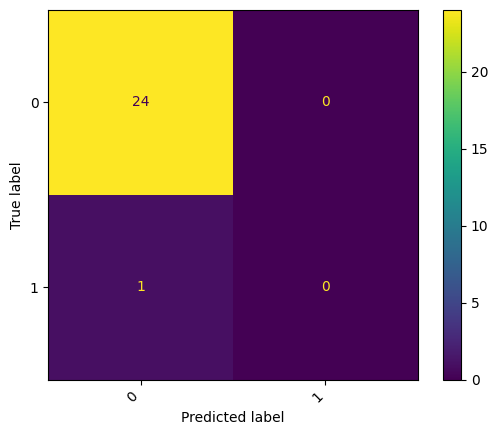

In [ ]:
# Evaluating accelerometer data without time features
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Generate predictions with the best model
y_predict = model_ml.predict(X_test)
print(classification_report(y_test,y_predict))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_predict)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
#ConfusionMatrixDisplay(model_ml, X_test, y_test)
plt.xticks(rotation=45, ha='right')
plt.show()